In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ls

Untitled.ipynb  files_for_lab/  readme.md


In [3]:
data = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## 1. Get the numerical variables from our dataset.

In [4]:
numericals = data.select_dtypes(np.number)
numericals.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


## 2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

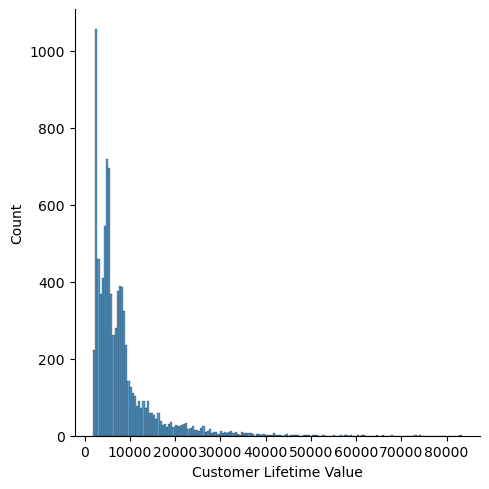

In [5]:
sns.displot(numericals['Customer Lifetime Value'])
plt.show()

## 3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [6]:
def log_transform_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return 0

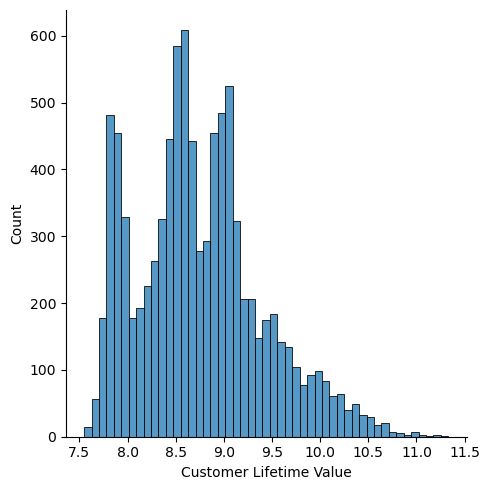

In [7]:
temp = numericals['Customer Lifetime Value'].apply(log_transform_clean)
sns.displot(temp)
plt.show()

### Observation: The distribution looks definitely more "normal" than before. At least we got rid of the long tail towards higher customer lifetime value. If we want to have a more thorough evaluation of the "normalness", we can make use of a variety of tools (read e.g. here). We will create a QQ-plot in which the quantiles of our data are compared with the quantiles of a theoretical normal distribution. Should our data be perfectly normal distributed, the data would be on a line. If not, they'd deviate from that.

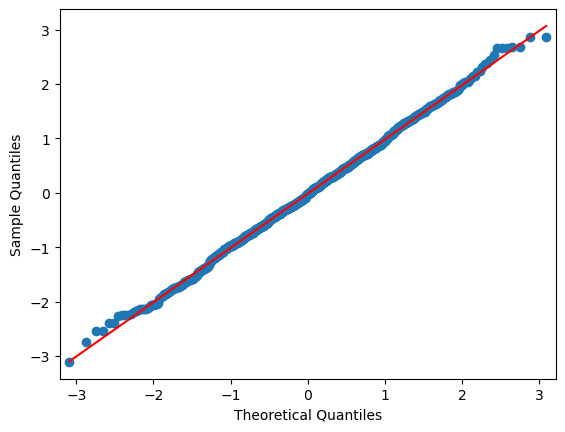

In [8]:
import statsmodels.api as sm
from scipy.stats import norm
import pylab

# This is how a qq-plot would look like for 1000 random numbers drawn from
# an ideal normal distribution. Dots almost perfectly show up on a straight line
my_data = norm.rvs(size=1000)
sm.qqplot(my_data, line='r')
pylab.show()

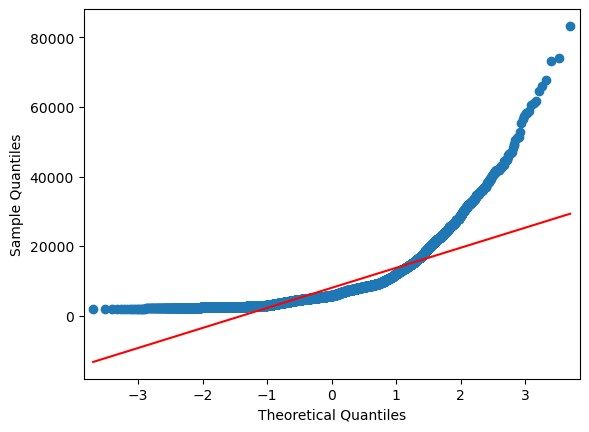

In [9]:
# this is a qq-plot for our untransformed data. the datapoints are not linear
sm.qqplot(numericals['Customer Lifetime Value'], line='r')
pylab.show()

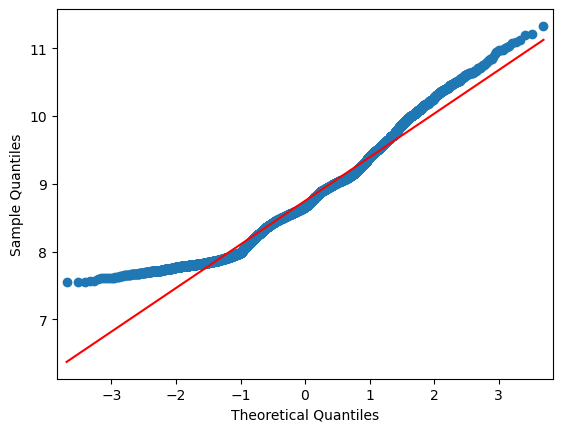

In [10]:
# this is a qq-plot for our transformed data. Still bad, but our quantiles compared with
# the theoretical quantiles from a a normal distribution
# approached a bit more a linear relationship
sm.qqplot(temp, line='r')
pylab.show()